In [58]:
import matplotlib.pyplot as plt
import numpy as np
from smoke_model import *
from weather import weather
from emergency import emergency
from domain import domain

# Inputs

In [63]:
vx, vy = weather("constant light breeze") # read weather data (wind velocity, direction, temperature)
map, x, y, Lx, Ly, Nx, Ny, dx, dy = domain("data/houses.png", Nx=201, Ny=201) # read domain data (map of the area)
print("Domain size (m): ", Lx, Ly, " Grid points: ", Nx, Ny)
emergency_x, emergency_y, Q, Hmix, K = emergency("small fire", 100, 50) # set emergency type and location

Domain size (m):  2015 1216  Grid points:  201 201


# timestep

In [75]:
timestep = 899 #s
t_final = 900  # 15 minutes in seconds
dt, nt = stability_constraints(dx, dy, vx, vy, K, t_final)

dx=10.07 m, dy=6.08 m, dt=0.116 s, nt=7791, u=(1.41,-1.41) m/s, K=10.0 m^2/s


In [76]:
C, src_mask = initialize_source_distribution(emergency_x, emergency_y, Q, x, y, Nx, Ny, dx, dy, Hmix)
snapshots = smoke_concentration(C, save_times=[timestep,], dt=dt, nt=nt, vx=vx, vy=vy, dx=dx, dy=dy, K=K, src_mask=src_mask)
print(snapshots.keys())

Source at grid cell (iy,ix)=(108,10), S_cell=8.162e-07 g/m^3/s
dict_keys([7782])


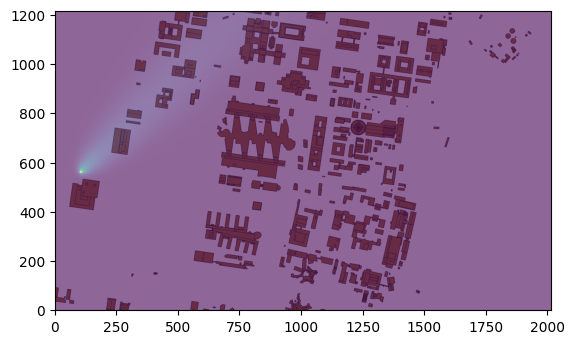

In [78]:
plt.figure()
plt.imshow(map, extent=[0, Lx, 0, Ly], zorder=0)
plt.imshow(snapshots[7782], alpha=0.6, extent=(0,Lx, 0, Ly), zorder=1)